In [376]:
import pandas as pd
import json

In [377]:
radar_df = pd.read_csv("data/processed data/radar_data_23.csv")
lidar_df = pd.read_csv("data/processed data/lidar_data_23.csv")
radar_df

,"X, (m)","Y, (m)","Z, (m)",AbsoluteRadialVelocity,RadarCrossSection,RelativeRadialVelocity,RelativeLateralVelocity,Range,DistanceAccuracy,AngleAccuracy,...,HasQuality,QPDH0,QDistLongRMS,QDistLatRMS,QVLongRMS,QVLatRMS,QAmbigState,QInvalidState,"(radar_point_ts - lidar_ts), (s)",radar_idx
0,-15.321997,5.933666,0.0,0.156776,-6.0,5.233620,0.0,0.0,0.1,0.005721,...,1.0,0.25,1.023,1.023,0.371,0.011,3.0,0.0,-1.968344,1.0
1,-19.921696,5.896532,0.0,0.396233,-6.5,6.038622,0.0,0.0,0.1,0.005442,...,1.0,0.75,0.794,0.616,0.288,0.011,3.0,4.0,-1.968344,1.0
2,-24.727871,6.657749,0.0,0.402186,4.5,6.170148,0.0,0.0,0.1,0.005733,...,1.0,0.25,0.794,0.616,0.288,0.011,3.0,0.0,-1.968344,1.0
3,-34.883404,1.175644,0.0,-5.090072,-6.0,0.999993,0.0,0.0,0.1,0.005247,...,1.0,0.75,1.697,0.616,0.288,0.011,2.0,4.0,-1.968344,1.0
4,-29.437876,20.220018,0.0,0.332596,6.0,4.829146,0.0,0.0,0.1,0.013172,...,1.0,0.25,1.317,1.317,0.371,0.011,3.0,0.0,-1.968344,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,32.962822,-1.971140,0.0,13.939093,17.0,6.976833,0.0,1.0,0.4,0.001745,...,1.0,0.25,2.817,0.616,0.288,0.011,3.0,0.0,-0.053616,7.0
4866,52.961449,-6.177660,0.0,3.705565,17.5,-3.220845,0.0,1.0,0.4,0.001745,...,1.0,0.25,3.630,0.794,0.288,0.011,3.0,0.0,-0.053616,7.0
4867,64.164581,3.418682,0.0,-0.023952,-5.5,-6.990487,0.0,1.0,0.4,0.001745,...,1.0,0.75,4.676,1.023,0.288,0.011,1.0,4.0,-0.053616,7.0
4868,75.960266,-9.785159,0.0,0.237223,-7.0,-6.683095,0.0,1.0,0.4,0.001745,...,1.0,0.75,4.676,2.187,0.288,0.011,1.0,4.0,-0.053616,7.0


In [378]:
with open(f"data/raw data/radar_positions.json", "r") as file:
    radar_positions = {float(k): v for k, v in json.load(file).items()}

for i, cords in radar_positions.items():
    for j, ax in enumerate(("X, (m)", "Y, (m)", "Z, (m)")):
        radar_df.loc[radar_df["radar_idx"] == i, ax] -= cords[j]

radar_df

,"X, (m)","Y, (m)","Z, (m)",AbsoluteRadialVelocity,RadarCrossSection,RelativeRadialVelocity,RelativeLateralVelocity,Range,DistanceAccuracy,AngleAccuracy,...,HasQuality,QPDH0,QDistLongRMS,QDistLatRMS,QVLongRMS,QVLatRMS,QAmbigState,QInvalidState,"(radar_point_ts - lidar_ts), (s)",radar_idx
0,-20.177997,4.643666,-3.240,0.156776,-6.0,5.233620,0.0,0.0,0.1,0.005721,...,1.0,0.25,1.023,1.023,0.371,0.011,3.0,0.0,-1.968344,1.0
1,-24.777696,4.606532,-3.240,0.396233,-6.5,6.038622,0.0,0.0,0.1,0.005442,...,1.0,0.75,0.794,0.616,0.288,0.011,3.0,4.0,-1.968344,1.0
2,-29.583871,5.367749,-3.240,0.402186,4.5,6.170148,0.0,0.0,0.1,0.005733,...,1.0,0.25,0.794,0.616,0.288,0.011,3.0,0.0,-1.968344,1.0
3,-39.739404,-0.114356,-3.240,-5.090072,-6.0,0.999993,0.0,0.0,0.1,0.005247,...,1.0,0.75,1.697,0.616,0.288,0.011,2.0,4.0,-1.968344,1.0
4,-34.293876,18.930018,-3.240,0.332596,6.0,4.829146,0.0,0.0,0.1,0.013172,...,1.0,0.25,1.317,1.317,0.371,0.011,3.0,0.0,-1.968344,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,27.823822,-2.303140,-0.635,13.939093,17.0,6.976833,0.0,1.0,0.4,0.001745,...,1.0,0.25,2.817,0.616,0.288,0.011,3.0,0.0,-0.053616,7.0
4866,47.822449,-6.509660,-0.635,3.705565,17.5,-3.220845,0.0,1.0,0.4,0.001745,...,1.0,0.25,3.630,0.794,0.288,0.011,3.0,0.0,-0.053616,7.0
4867,59.025581,3.086682,-0.635,-0.023952,-5.5,-6.990487,0.0,1.0,0.4,0.001745,...,1.0,0.75,4.676,1.023,0.288,0.011,1.0,4.0,-0.053616,7.0
4868,70.821266,-10.117159,-0.635,0.237223,-7.0,-6.683095,0.0,1.0,0.4,0.001745,...,1.0,0.75,4.676,2.187,0.288,0.011,1.0,4.0,-0.053616,7.0


In [379]:
delta_t = 0.06
vector_length = (radar_df['X, (m)']**2 + radar_df['Y, (m)']**2)**0.5
radar_df['RadialDelta'] = (delta_t - radar_df['(radar_point_ts - lidar_ts), (s)']) * radar_df['AbsoluteRadialVelocity']
radar_df['XwithDelta'] = radar_df['X, (m)'] * (vector_length + radar_df['RadialDelta']) / vector_length
radar_df['YwithDelta'] = radar_df['Y, (m)'] * (vector_length + radar_df['RadialDelta']) / vector_length
radar_df['ZwithDelta'] = radar_df['Z, (m)'] * (vector_length + radar_df['RadialDelta']) / vector_length


for i, cords in radar_positions.items():
    for j, ax in enumerate(("X, (m)", "Y, (m)", "Z, (m)")):
        radar_df.loc[radar_df["radar_idx"] == i, ax] += cords[j]

In [380]:
with open(f"data/raw data/radar_positions.json", "r") as file:
    radar_positions = {float(k): v for k, v in json.load(file).items()}

for i, cords in radar_positions.items():
    for j, ax in enumerate(("XwithDelta", "YwithDelta", "ZwithDelta")):
        radar_df.loc[radar_df["radar_idx"] == i, ax] += cords[j]

radar_df

,"X, (m)","Y, (m)","Z, (m)",AbsoluteRadialVelocity,RadarCrossSection,RelativeRadialVelocity,RelativeLateralVelocity,Range,DistanceAccuracy,AngleAccuracy,...,QVLongRMS,QVLatRMS,QAmbigState,QInvalidState,"(radar_point_ts - lidar_ts), (s)",radar_idx,RadialDelta,XwithDelta,YwithDelta,ZwithDelta
0,-15.321997,5.933666,0.0,0.156776,-6.0,5.233620,0.0,0.0,0.1,0.005721,...,0.371,0.011,3.0,0.0,-1.968344,1.0,0.317997,-15.631893,6.004984,-0.049760
1,-19.921696,5.896532,0.0,0.396233,-6.5,6.038622,0.0,0.0,0.1,0.005442,...,0.288,0.011,3.0,4.0,-1.968344,1.0,0.803697,-20.711853,6.043434,-0.103323
2,-24.727871,6.657749,0.0,0.402186,4.5,6.170148,0.0,0.0,0.1,0.005733,...,0.288,0.011,3.0,0.0,-1.968344,1.0,0.815772,-25.530537,6.803386,-0.087907
3,-34.883404,1.175644,0.0,-5.090072,-6.0,0.999993,0.0,0.0,0.1,0.005247,...,0.288,0.011,2.0,4.0,-1.968344,1.0,-10.324420,-24.559027,1.205354,0.841759
4,-29.437876,20.220018,0.0,0.332596,6.0,4.829146,0.0,0.0,0.1,0.013172,...,0.371,0.011,3.0,0.0,-1.968344,1.0,0.674619,-30.028490,20.546034,-0.055800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,32.962822,-1.971140,0.0,13.939093,17.0,6.976833,0.0,1.0,0.4,0.001745,...,0.288,0.011,3.0,0.0,-0.053616,7.0,1.583705,34.541129,-2.101785,-0.036020
4866,52.961449,-6.177660,0.0,3.705565,17.5,-3.220845,0.0,1.0,0.4,0.001745,...,0.288,0.011,3.0,0.0,-0.053616,7.0,0.421012,53.378613,-6.234445,-0.005539
4867,64.164581,3.418682,0.0,-0.023952,-5.5,-6.990487,0.0,1.0,0.4,0.001745,...,0.288,0.011,1.0,4.0,-0.053616,7.0,-0.002721,64.161864,3.418540,0.000029
4868,75.960266,-9.785159,0.0,0.237223,-7.0,-6.683095,0.0,1.0,0.4,0.001745,...,0.288,0.011,1.0,4.0,-0.053616,7.0,0.026952,75.986948,-9.788971,-0.000239


In [381]:
radar_df

,"X, (m)","Y, (m)","Z, (m)",AbsoluteRadialVelocity,RadarCrossSection,RelativeRadialVelocity,RelativeLateralVelocity,Range,DistanceAccuracy,AngleAccuracy,...,QVLongRMS,QVLatRMS,QAmbigState,QInvalidState,"(radar_point_ts - lidar_ts), (s)",radar_idx,RadialDelta,XwithDelta,YwithDelta,ZwithDelta
0,-15.321997,5.933666,0.0,0.156776,-6.0,5.233620,0.0,0.0,0.1,0.005721,...,0.371,0.011,3.0,0.0,-1.968344,1.0,0.317997,-15.631893,6.004984,-0.049760
1,-19.921696,5.896532,0.0,0.396233,-6.5,6.038622,0.0,0.0,0.1,0.005442,...,0.288,0.011,3.0,4.0,-1.968344,1.0,0.803697,-20.711853,6.043434,-0.103323
2,-24.727871,6.657749,0.0,0.402186,4.5,6.170148,0.0,0.0,0.1,0.005733,...,0.288,0.011,3.0,0.0,-1.968344,1.0,0.815772,-25.530537,6.803386,-0.087907
3,-34.883404,1.175644,0.0,-5.090072,-6.0,0.999993,0.0,0.0,0.1,0.005247,...,0.288,0.011,2.0,4.0,-1.968344,1.0,-10.324420,-24.559027,1.205354,0.841759
4,-29.437876,20.220018,0.0,0.332596,6.0,4.829146,0.0,0.0,0.1,0.013172,...,0.371,0.011,3.0,0.0,-1.968344,1.0,0.674619,-30.028490,20.546034,-0.055800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,32.962822,-1.971140,0.0,13.939093,17.0,6.976833,0.0,1.0,0.4,0.001745,...,0.288,0.011,3.0,0.0,-0.053616,7.0,1.583705,34.541129,-2.101785,-0.036020
4866,52.961449,-6.177660,0.0,3.705565,17.5,-3.220845,0.0,1.0,0.4,0.001745,...,0.288,0.011,3.0,0.0,-0.053616,7.0,0.421012,53.378613,-6.234445,-0.005539
4867,64.164581,3.418682,0.0,-0.023952,-5.5,-6.990487,0.0,1.0,0.4,0.001745,...,0.288,0.011,1.0,4.0,-0.053616,7.0,-0.002721,64.161864,3.418540,0.000029
4868,75.960266,-9.785159,0.0,0.237223,-7.0,-6.683095,0.0,1.0,0.4,0.001745,...,0.288,0.011,1.0,4.0,-0.053616,7.0,0.026952,75.986948,-9.788971,-0.000239


In [382]:
# import plotly.express as px
# fig = px.scatter_3d(lidar_df[['X, (m)', "Y, (m)", "Z, (m)"]], x="X, (m)", y="Y, (m)", z="Z, (m)")
# fig.update_traces(marker=dict(size=1, opacity=0.05))

# import plotly.io as pio
# pio.renderers.default = 'notebook'

import plotly.express as px
fig = px.scatter_3d(lidar_df[['X, (m)', "Y, (m)", "Z, (m)"]], x="X, (m)", y="Y, (m)", z="Z, (m)")
fig.update_traces(marker=dict(size=1, opacity=0.05))

import plotly.io as pio
pio.renderers.default = 'notebook'

fig.write_html("data/asd.html")

fig.write_html("data/asd.html")

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Создаем фигуру
fig = go.Figure()

# Добавляем точки из первого DataFrame (красные)
fig.add_trace(go.Scatter3d(
    x=radar_df['XwithDelta'],
    y=radar_df['YwithDelta'],
    z=radar_df['ZwithDelta'],
    mode='markers',
    marker=dict(size=1, color='red', opacity=0.08), # Красные точки
    name='DataFrame 1'
))

# Добавляем точки из второго DataFrame (синие)
fig.add_trace(go.Scatter3d(
    x=lidar_df['X, (m)'],
    y=lidar_df['Y, (m)'],
    z=lidar_df['Z, (m)'],
    mode='markers',
    marker=dict(size=1, color='blue', opacity=0.08), # Синие точки
    name='DataFrame 2',
    
))

# Настраиваем заголовок и оси
fig.update_layout(title='3D Scatter Plot with Two DataFrames',
                  scene=dict(
                      xaxis_title='X Axis',
                      yaxis_title='Y Axis',
                      zaxis_title='Z Axis'
                  ))

# Показываем график
# fig.show()
# 
# fig = px.scatter_3d(lidar_df[['X, (m)', "Y, (m)", "Z, (m)"]], x="X, (m)", y="Y, (m)", z="Z, (m)")
# fig.update_traces(marker=dict(size=1, opacity=0.05))


# import plotly.io as pio
# pio.renderers.default = 'notebook'

fig.write_html("data/asd.html")

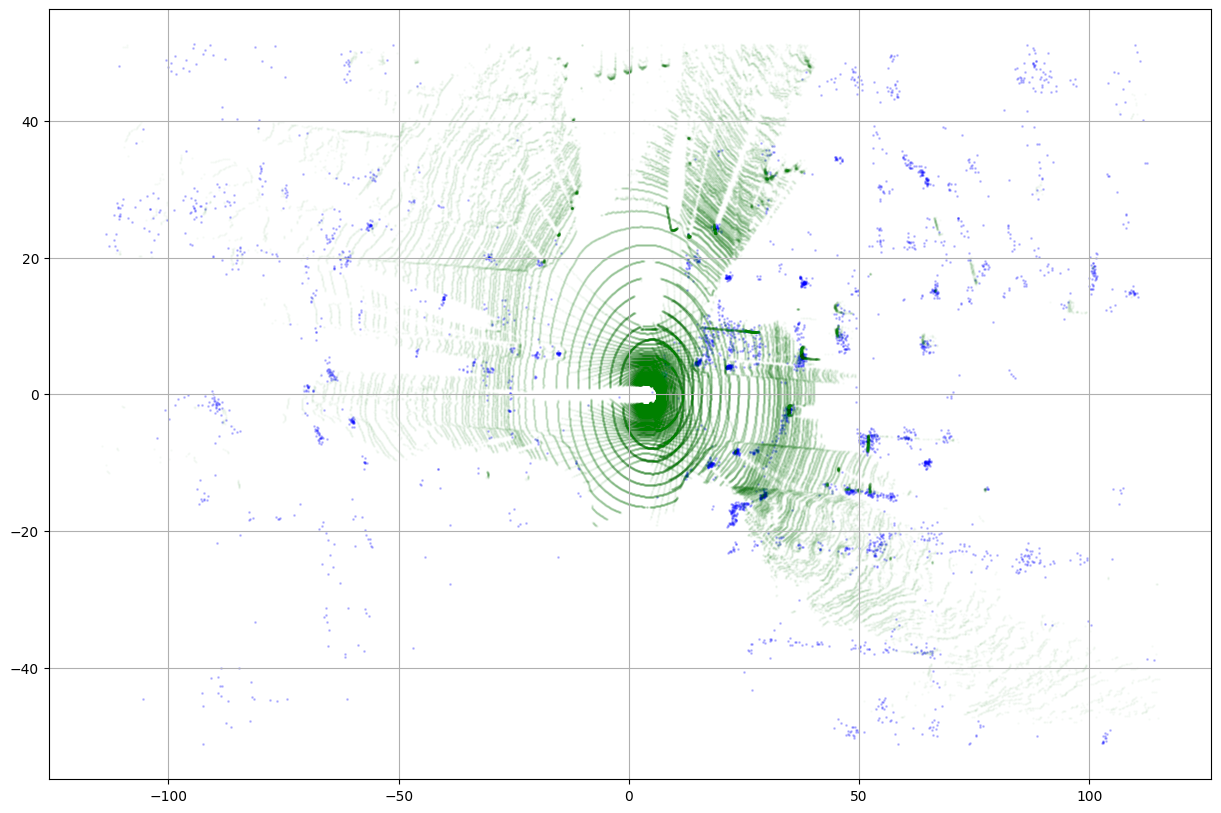

In [388]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.grid()

# plt.scatter(
#     radar_df[radar_df["QPDH0"] < 0.75]["X, (m)"],
#     radar_df[radar_df["QPDH0"] < 0.75]["Y, (m)"],
#     s=1,
#     c="red",
#     alpha=0.2,
# )
plt.scatter(
    radar_df[radar_df["QPDH0"] < 0.75]["XwithDelta"],
    radar_df[radar_df["QPDH0"] < 0.75]["YwithDelta"],
    s=1,
    c="blue",
    alpha=0.2,
)
plt.scatter(lidar_df["X, (m)"], lidar_df["Y, (m)"], s=1, c="green", alpha=0.02)

plt.savefig("data/asd.png")